# Exporting data to pandas data frame from SQL database csv files of Udacity for data analysis

## Used the following queries for data extraction from the SQL database from workspace:
- select * from city_data 
- select * from city_list 
- select * from global_data 

### Further saved them to csv and using python for analysis and plotting of the graphs

In [1]:
import pandas as pd
from IPython.display import display

In [2]:
city_data = pd.read_csv("city_data.csv")
city_list = pd.read_csv("city_list.csv")
global_data = pd.read_csv("global_data.csv")

In [3]:
display(city_data.head())
display(city_list.head())
display(global_data.head())

,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52
2,1851,Abidjan,Côte D'Ivoire,25.67
3,1852,Abidjan,Côte D'Ivoire,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN


,city,country
0,Abidjan,Côte D'Ivoire
1,Abu Dhabi,United Arab Emirates
2,Abuja,Nigeria
3,Accra,Ghana
4,Adana,Turkey


,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


# Creating a dataframe of cities in India

In [4]:
city_india = city_list[city_list['country'].str.contains("India")]

In [5]:
display(city_india)

,city,country
6,Agra,India
7,Ahmadabad,India
12,Allahabad,India
14,Amritsar,India
30,Bangalore,India
44,Bhopal,India
85,Delhi,India
117,Haora,India
125,Hyderabad,India
129,Indore,India


## Selecting Bhopal as the city for comparison with global data

In [6]:
bhopal_data = city_data[city_data['city'].str.contains("Bhopal")]

In [7]:
display(bhopal_data.head(5))

,year,city,country,avg_temp
9532,1796,Bhopal,India,25.06
9533,1797,Bhopal,India,26.27
9534,1798,Bhopal,India,24.24
9535,1799,Bhopal,India,25.33
9536,1800,Bhopal,India,25.30


In [8]:
df = pd.concat([bhopal_data,global_data], axis=0, ignore_index=True, sort=True)

## Bringing all required data into a single dataframe using full outer merge

In [9]:
df = global_data.merge(bhopal_data, left_on='year', right_on='year', how = 'outer', suffixes = ('_global','_bhopal'))
df = df.set_index('year')
df = df.drop(['city','country'], axis = 1)

## Adding new columns for moving average for temperature
### We are using rolling method to find the moving average

In [10]:
df['rm_global_temp'] = df['avg_temp_global'].rolling(window = 5).mean()
df['rm_bhopal_temp'] = df['avg_temp_bhopal'].rolling(window = 5).mean()

In [11]:
df_rm = df
df_rm = df.drop(['avg_temp_global','avg_temp_bhopal'], axis = 1)
df_rm.tail(10)

,rm_global_temp,rm_bhopal_temp
year,,
2006,9.530,26.154
2007,9.562,26.034
2008,9.542,25.936
2009,9.580,26.028
2010,9.580,26.186
2011,9.578,26.122
2012,9.534,26.096
2013,9.570,26.240
2014,9.582,NaN


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy
%matplotlib inline

Text(0, 0.5, 'Average Temperature each year')

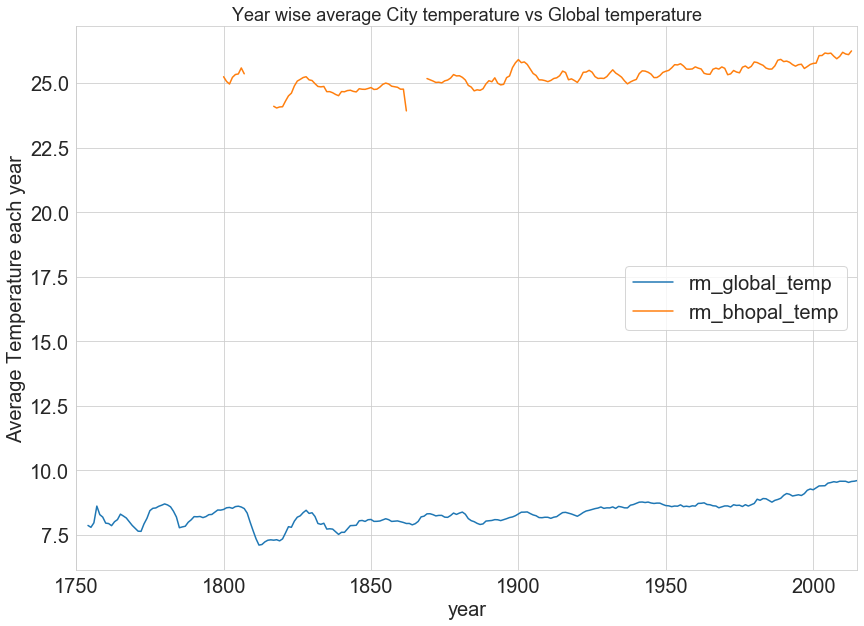

In [25]:
rcParams['figure.figsize'] = 14,10
sns.set_style('whitegrid')
plt.rc('font', size=15)
plt.rc('legend',fontsize=20)
ax = df_rm.plot(title = "Year wise average City temperature vs Global temperature", fontsize = 20)
ax.set_xlabel("year", fontsize = 20)
ax.set_ylabel("Average Temperature each year", fontsize = 20)

In [14]:
display(df.describe())

,avg_temp_global,avg_temp_bhopal,rm_global_temp,rm_bhopal_temp
count,266.000000,211.000000,262.000000,199.000000
mean,8.369474,25.235261,8.363260,25.261065
std,0.584747,0.649146,0.490067,0.442238
min,5.780000,20.120000,7.108000,23.918000
25%,8.082500,24.915000,8.045000,24.980000
50%,8.375000,25.230000,8.320000,25.246000
75%,8.707500,25.645000,8.627000,25.572000
max,9.830000,26.680000,9.608000,26.240000


# Observations
- Bhopal is hotter than gobal temp in average by about 17 degrees every year
- There are 55 missing values in bhopal average temperature column
- Yearly avg. global temp from 1750 to 2015 varies from 5.78 to 9.83 whereas Bhopal varies from 20.12 to 26.68
- Over the last few years the temperature is steadily rising on the global as well as local level